<a href="https://colab.research.google.com/github/Kross363/Python-Data-Science/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

### Usar python, pandas y matplotlib

La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

In [65]:
import pandas as pd
datos=pd.read_json('TelecomX_Data.json')
datos.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [66]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

In [67]:
datos['Churn']=datos['Churn'].astype(str)
datos['customerID']=datos['customerID'].astype(str)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [68]:
pd.unique(datos['Churn'])
#Esto sugiere que los clientes pueden haber optado por "No" cancelar, "Sí" cancelar, o que hay entradas vacías o no definidas en esa columna.
#Esta funcion solo funciona con datos de un solo tipo, no con "customer" por ejemplo que es un diccionario

array(['No', 'Yes', ''], dtype=object)

In [69]:
pd.unique(datos['customerID'])

array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)

In [70]:
# Normalizar la columna 'customer'
customer_normalized = pd.json_normalize(datos['customer'])
# Unir las columnas normalizadas al DataFrame original
datos = pd.concat([datos, customer_normalized], axis=1)
# Eliminar la columna original 'customer'
datos = datos.drop(columns=['customer'])

In [71]:
# Normalizar la columna 'phone'
phone_normalized = pd.json_normalize(datos['phone'])
# Unir las columnas normalizadas al DataFrame original
datos = pd.concat([datos, phone_normalized], axis=1)
# Eliminar la columna original 'phone'
datos = datos.drop(columns=['phone'])
# Normalizar la columna 'internet'
internet_normalized = pd.json_normalize(datos['internet'])
# Unir las columnas normalizadas al DataFrame original
datos = pd.concat([datos, internet_normalized], axis=1)
# Eliminar la columna original 'internet'
datos = datos.drop(columns=['internet'])
# Normalizar la columna 'account'
account_normalized = pd.json_normalize(datos['account'])
# Unir las columnas normalizadas al DataFrame original
datos = pd.concat([datos, account_normalized], axis=1)
# Eliminar la columna original 'account'
datos = datos.drop(columns=['account'])
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [72]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [73]:
#pasamos el total a float
datos['Charges.Total']=pd.to_numeric(datos['Charges.Total'], errors='coerce')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [74]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [75]:
datos['Cuentas_Diarias'] = (datos['Charges.Monthly'] / 30).round(2)
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


In [76]:
# Mapeo para convertir 'Yes' a 1 y todas las formas de 'No' (incluyendo vacías y 'No service') a 0
value_mapping = {'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0, '': 0}

for col in datos.columns:
    unique_values = datos[col].unique()

    # Convertir a string para asegurar que la comparación sea consistente
    unique_values_str = [str(val) for val in unique_values]

    # Verificar si 'Yes' está presente y al menos una forma de 'No' está presente
    has_yes = 'Yes' in unique_values_str
    has_no_like = any(val in unique_values_str for val in ['No', 'No phone service', 'No internet service', ''])

    # Verificar si todos los valores únicos de la columna están cubiertos por nuestro mapeo
    all_mappable = all(val in value_mapping for val in unique_values_str)

    # Si la columna cumple con los criterios para ser binaria (solo Yes/No-like valores)
    if has_yes and has_no_like and all_mappable:
        print(f"Columna convertida a binario: {col}")
        # Aplicar el mapeo y convertir a tipo entero
        datos[col] = datos[col].replace(value_mapping).astype(int)

datos.head()

Columna convertida a binario: Churn
Columna convertida a binario: Partner
Columna convertida a binario: Dependents
Columna convertida a binario: PhoneService
Columna convertida a binario: MultipleLines
Columna convertida a binario: OnlineSecurity
Columna convertida a binario: OnlineBackup
Columna convertida a binario: DeviceProtection
Columna convertida a binario: TechSupport
Columna convertida a binario: StreamingTV
Columna convertida a binario: StreamingMovies
Columna convertida a binario: PaperlessBilling


/tmp/ipython-input-3862055108.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos[col] = datos[col].replace(value_mapping).astype(int)
/tmp/ipython-input-3862055108.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos[col] = datos[col].replace(value_mapping).astype(int)
/tmp/ipython-input-3862055108.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavio

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


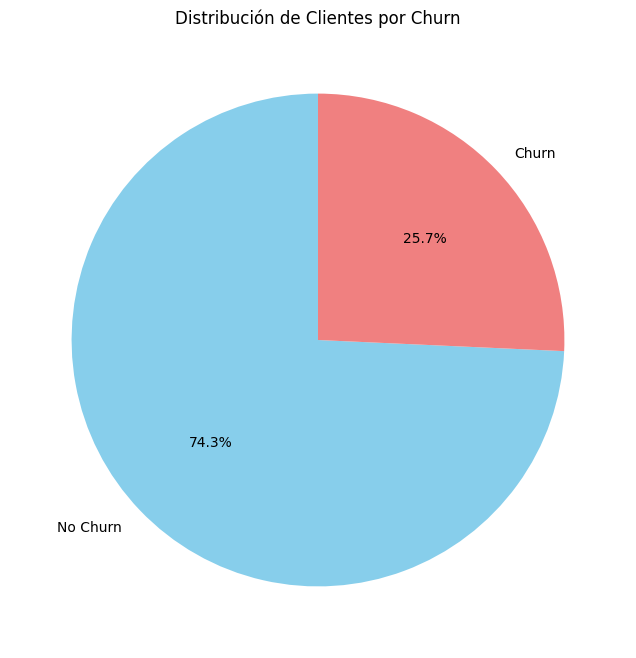

In [77]:
import matplotlib.pyplot as plt

# Contar la ocurrencia de cada valor en la columna 'Churn'
churn_counts = datos['Churn'].value_counts()

# Etiquetas para el gráfico de pastel
labels = ['No Churn' if idx == 0 else 'Churn' for idx in churn_counts.index]

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribución de Clientes por Churn')
plt.show()

#📊 Carga y análisis

In [78]:
datos.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2280.634213,2.157292
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.632997,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,400.225000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3785.300000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


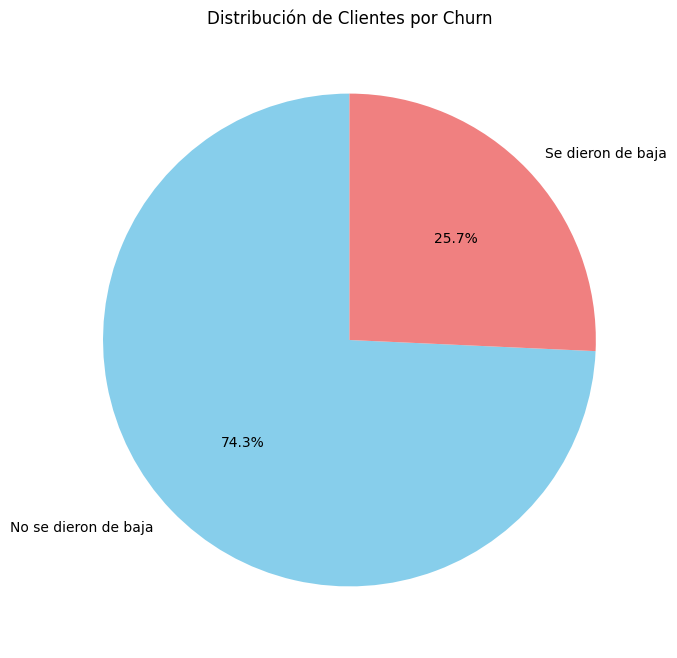

In [79]:
import matplotlib.pyplot as plt

# Contar la ocurrencia de cada valor en la columna 'Churn'
churn_counts = datos['Churn'].value_counts()

# Etiquetas para el gráfico de pastel
labels = ['No se dieron de baja' if idx == 0 else 'Se dieron de baja' for idx in churn_counts.index]

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribución de Clientes por Churn')
plt.show()

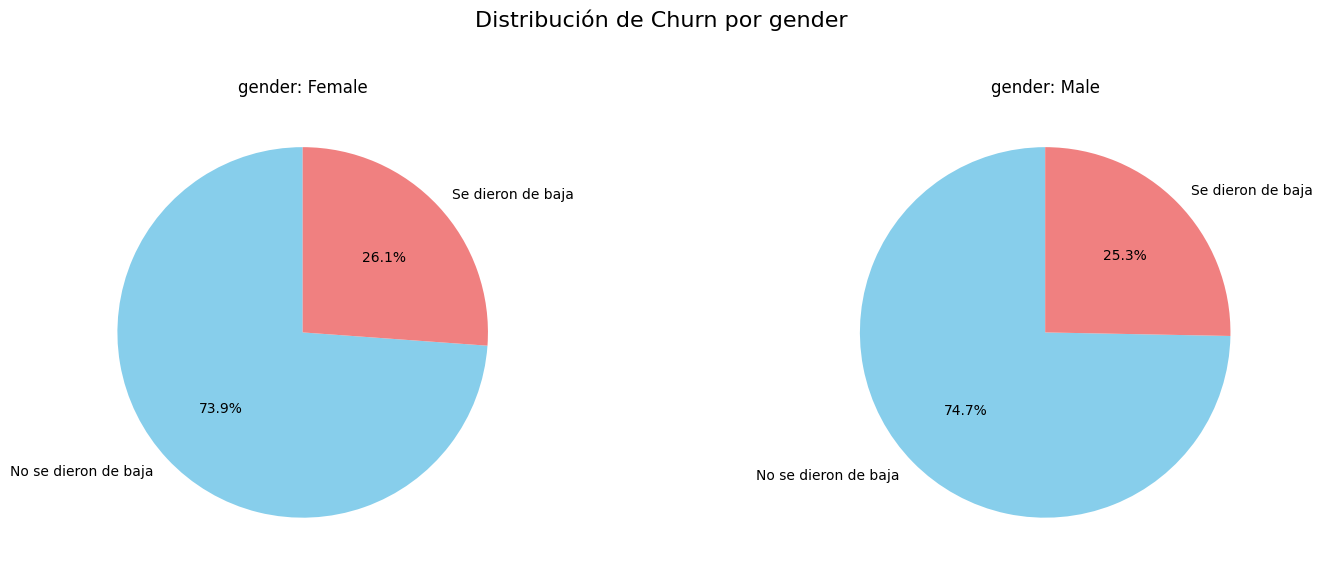

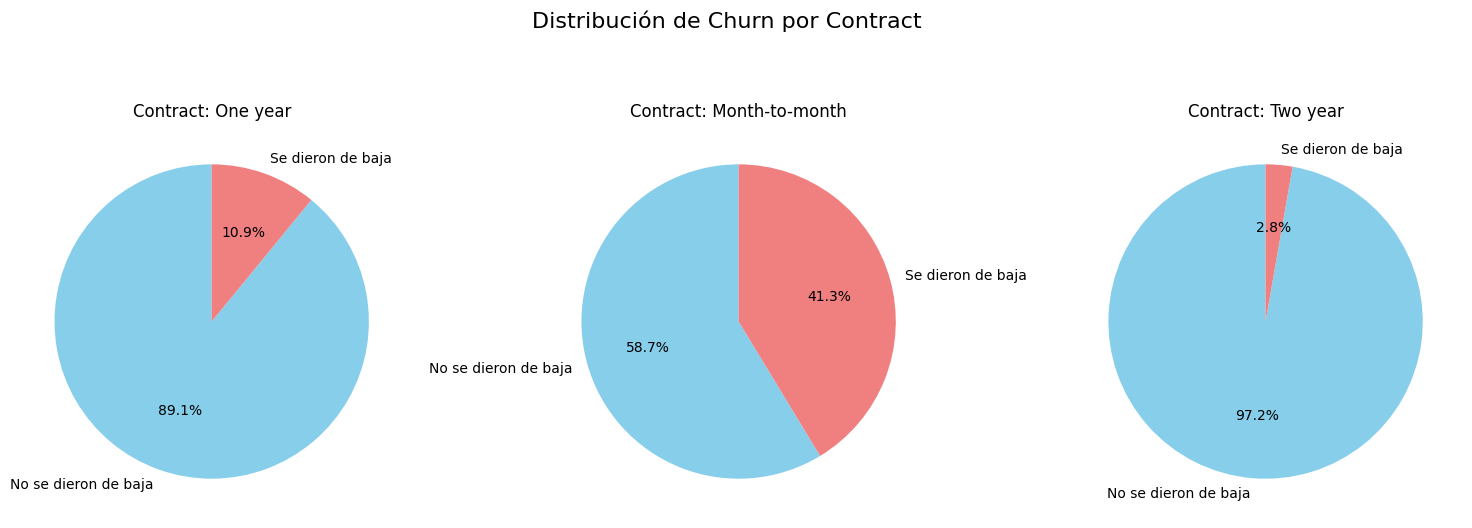

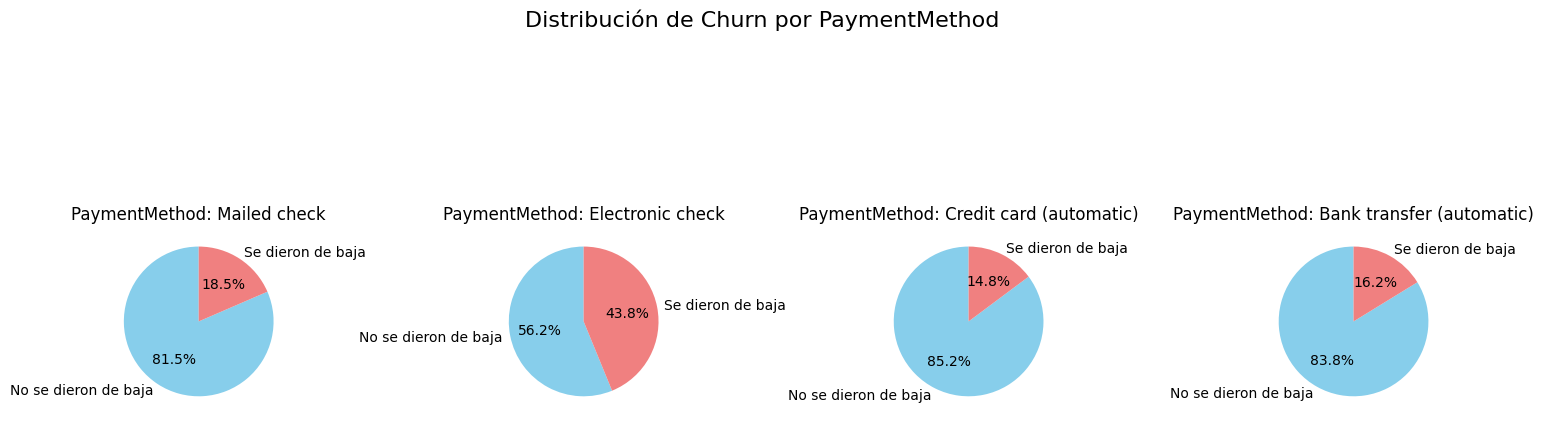

In [80]:
import matplotlib.pyplot as plt

categorical_cols = ['gender', 'Contract', 'PaymentMethod']

for col in categorical_cols:
    plt.figure(figsize=(15, 6)) # Adjust figure size dynamically based on number of unique categories
    unique_categories = datos[col].unique()
    num_subsets = len(unique_categories)

    plt.suptitle(f'Distribución de Churn por {col}', fontsize=16)

    for i, category_value in enumerate(unique_categories):
        subset_data = datos[datos[col] == category_value]
        churn_counts = subset_data['Churn'].value_counts()

        # Labels for the pie chart
        labels = ['No se dieron de baja' if idx == 0 else 'Se dieron de baja' for idx in churn_counts.index]

        plt.subplot(1, num_subsets, i + 1) # One row, N columns
        plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
        plt.title(f'{col}: {category_value}')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for suptitle
    plt.show()

#📄Informe final

# Tarea

Analice las variables numéricas "Cargos.Total" y "Antigüedad" para comprender su relación con la pérdida de clientes. Esto implica generar visualizaciones (por ejemplo, diagramas de caja o histogramas) para comparar las distribuciones de estas variables para los clientes que se dieron de baja y los que no, asegurándose de que los títulos y las etiquetas sean adecuados. Finalmente, resuma las diferencias significativas observadas en estas distribuciones.

## Analisis de los cargos totales vs. evasion

### Subtarea:
Genere visualizaciones (p. ej., diagramas de caja o histogramas) para comparar la distribución de "Cargos.Total" (gasto total) de los clientes que abandonaron la cuenta y los que no. Asigne títulos y etiquetas adecuados a los gráficos.


**Razonamiento**:
 Para visualizar la distribución de "Cargos.Total" para clientes que han abandonado el servicio y los que no, creé un diagrama de caja con seaborn, que es ideal para comparar distribuciones entre categorías. Esto abordará directamente la primera instrucción de la subtarea.



/tmp/ipython-input-2150304760.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Charges.Total', data=datos, palette='Pastel1')


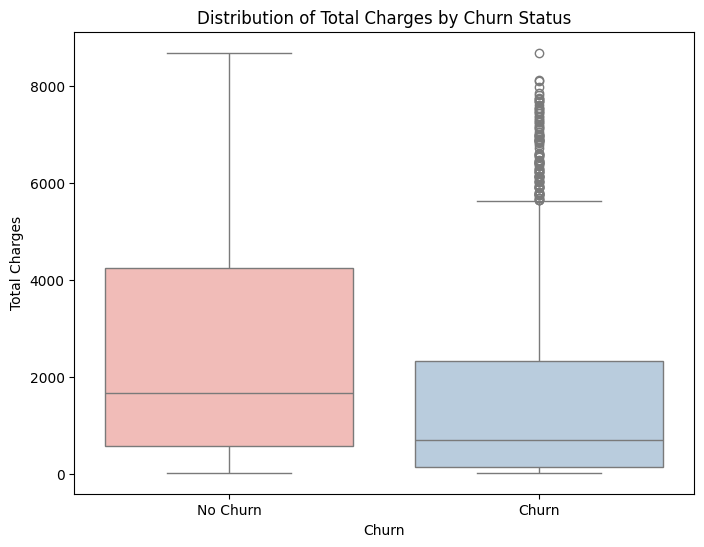

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Charges.Total', data=datos, palette='Pastel1')
plt.title('Distribution of Total Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

**Razonamiento**: El bloque de código anterior generó una advertencia futura sobre el uso de la paleta sin tono. Para solucionarlo, estableceré explícitamente hue='Churn' en la función sns.boxplot, lo que aplicará correctamente la paleta a las diferentes categorías de rotación y suprimirá la advertencia.


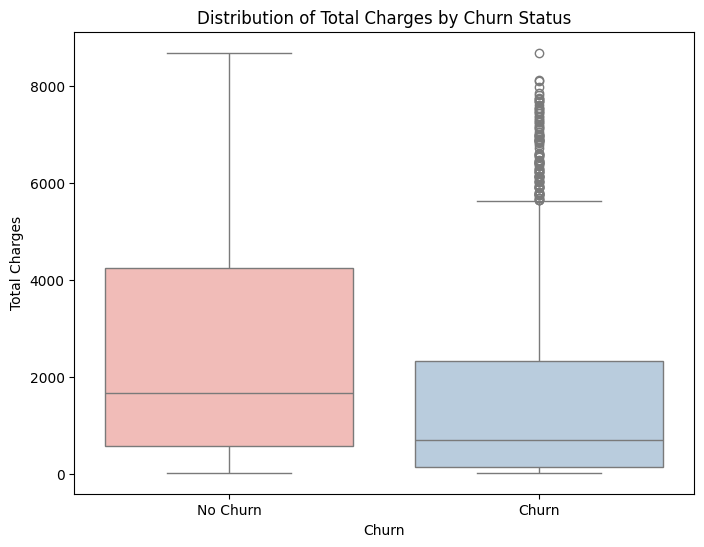

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Charges.Total', data=datos, hue='Churn', palette='Pastel1', legend=False)
plt.title('Distribution of Total Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

### Resumen de Cargos Totales vs. Rotación

El diagrama de caja muestra una clara diferencia en la distribución de Cargos Totales para los clientes que rotaron y los que no.

* **Clientes No Rotados (Sin Rotación)**: La distribución de los clientes no rotados generalmente muestra cargos totales más bajos, con una mediana de entre 1000 y 2000. La dispersión de cargos para estos clientes es más amplia, lo que indica una mezcla de clientes con cargos totales bajos y altos, pero con una tendencia hacia valores más bajos.

* **Clientes Rotados (Rotación)**: La distribución de los clientes rotados tiende a tener Cargos Totales más altos, con una mediana notablemente mayor que la de los clientes no rotados. El diagrama de caja para los clientes rotados también suele estar desplazado hacia arriba, lo que indica que los clientes con cargos totales más altos tienen mayor probabilidad de rotar. Esto sugiere que los clientes que acumulan cargos totales más altos podrían estar menos satisfechos o encontrar mejores ofertas en otros lugares.

En conclusión, los clientes con un "Total de Cargos" más alto parecen tener una mayor propensión a la pérdida de clientes. El importe total gastado por los clientes es un factor importante para predecir la pérdida de clientes.

## Analizar la antigüedad vs. la rotación

### Subtarea:
Generar visualizaciones (p. ej., diagramas de caja o histogramas) para comparar la distribución de la antigüedad de los clientes que se dieron de baja y los que no. Proporcione títulos y etiquetas apropiados para los gráficos.

**Razonamiento**:
Para visualizar la distribución de la antigüedad de los clientes que han abandonado el servicio y los que no, crearé un diagrama de caja. Esto permitirá una comparación clara de los rangos de antigüedad y las tendencias centrales de ambos grupos.



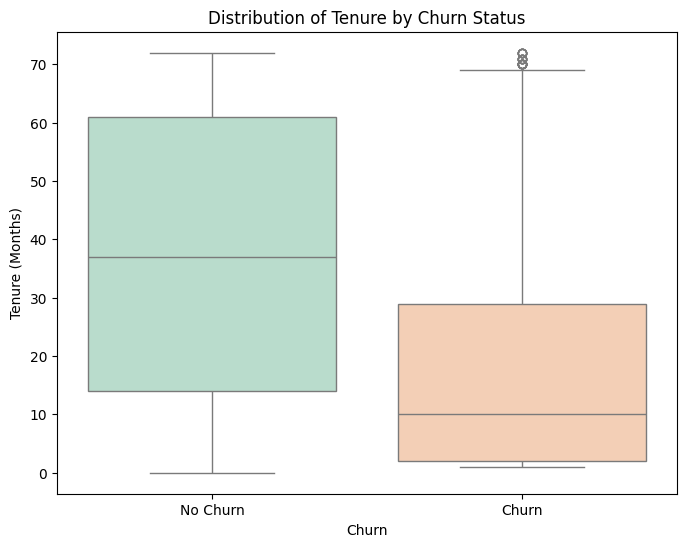

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=datos, hue='Churn', palette='Pastel2', legend=False)
plt.title('Distribution of Tenure by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

### Resumen de la antigüedad vs. la pérdida de clientes

El diagrama de caja revela patrones distintivos en la antigüedad del cliente según su estado de pérdida:

* **Clientes no perdidos (sin pérdida)**: Este grupo muestra una amplia distribución de antigüedad, que va desde periodos muy cortos hasta muy largos. La mediana de antigüedad de los clientes no perdidos es significativamente mayor, lo que indica que los clientes que permanecen en el servicio tienden a tener una mayor permanencia.

* **Clientes perdidos (pérdidas)**: En el caso de los clientes perdidos, la distribución de antigüedad se concentra en valores más bajos. La mediana de antigüedad de los clientes perdidos es considerablemente menor que la de los clientes no perdidos, lo que sugiere que los clientes con una menor permanencia son más propensos a la pérdida.

En conclusión, la antigüedad del cliente es un indicador sólido de la pérdida de clientes. Los clientes con una menor permanencia tienen una mayor probabilidad de pérdida, mientras que aquellos con una mayor permanencia tienden a permanecer en el servicio.

## Tarea final

### Subtarea:
Resumir los hallazgos del análisis de las variables numéricas, destacando cualquier diferencia significativa en las distribuciones entre clientes que abandonan y clientes que no abandonan.

## Resumen:

### Hallazgos Clave del Análisis de Datos

* **Cargos Totales (Cargos.Total)**: Los clientes que abandonan el servicio tienden a tener cargos totales significativamente más altos en comparación con los clientes que no lo han hecho. La mediana de los cargos totales de los clientes que abandonan el servicio fue notablemente mayor, lo que indica que los clientes con costos acumulados más altos son más propensos a abandonar el servicio.
* **Antigüedad**: Los clientes que abandonan el servicio presentan una permanencia considerablemente menor que los clientes que no lo han hecho. La mediana de la permanencia de los clientes que abandonan el servicio fue mucho menor, lo que sugiere que los clientes con menos tiempo de servicio son significativamente más propensos a abandonar el servicio.

### Perspectivas o Próximos Pasos

* **Estrategias de Retención Dirigidas**: Centrar los esfuerzos de retención en los clientes con cargos totales altos que podrían estar cerca del final de su contrato o mostrar signos de insatisfacción, y en los clientes más nuevos con una permanencia corta para evitar la pérdida temprana.
* **Investigación Adicional**: Analizar las razones específicas por las que los clientes con cargos totales más altos son más propensos a abandonar el servicio. Esto podría implicar explorar la sensibilidad al precio, la relación calidad-precio percibida o las ofertas competitivas.